In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
# Parámetros de la simulación
b = 20
g_mRNA_I = 0.347
g_mRNA_R = 0.347
params = {'n_cells':100,
          't_size':10e4,
          'mRNA_R_0':0,
          'k_mRNA_R':200/b,
          'g_mRNA_R':g_mRNA_R,
          'protein_R_0':0,
          'k_protein_R':b*g_mRNA_R,
          'g_protein_R':0.002,
          'mRNA_I_0':0,
          'alpha_mRNA_I':0.01,
          'beta_mRNA_I':130/b,
          'h':-2,
          'K':100,
          'g_mRNA_I':g_mRNA_I,
          'protein_I_0':0,
          'k_protein_I':b*g_mRNA_I,
          'g_protein_I':0.01,
          'autoinducer_0':0,
          'k_autoinducer':0.08,
          'g_autoinducer':0.001,
          'D':30,
          'autoinducer_protein_R_0':0,
          'k_autoinducer_protein_R':3,
          'g_autoinducer_protein_R':0.002,
          's_autoinducer_protein_R':0.1,
          'autoinducer_ext_0':0}

# Definición de la función de la simulación
def QS(**kwargs):
    cells = {}
    t_size = int(kwargs['t_size'])
    # Inicialización del parámetro del medio
    autoinducer_ext = kwargs['autoinducer_ext_0']
    Autoinducer_ext = np.zeros(t_size)
    Autoinducer_ext[0] = autoinducer_ext
    # Inicialización de los parámetros para cada célula
    for cell in range(kwargs['n_cells']):
        mRNA_R = kwargs['mRNA_R_0']
        protein_R = kwargs['protein_R_0']
        mRNA_I = kwargs['mRNA_I_0']
        protein_I = kwargs['protein_I_0']
        autoinducer = kwargs['autoinducer_0']
        autoinducer_protein_R = kwargs['autoinducer_protein_R_0']
    
        T = np.zeros(t_size)
        MRNA_R = np.zeros(t_size)
        MRNA_R[0] = mRNA_R
        Protein_R = np.zeros(t_size)
        Protein_R[0] = protein_R
        MRNA_I = np.zeros(t_size)
        MRNA_I[0] = mRNA_I
        Protein_I = np.zeros(t_size)
        Protein_I[0] = protein_I
        Autoinducer = np.zeros(t_size)
        Autoinducer[0] = autoinducer
        Autoinducer_protein_R = np.zeros(t_size)
        Autoinducer_protein_R[0] = autoinducer_protein_R
        cells[cell] = {'T':T,
                       'MRNA_R':MRNA_R,
                       'Protein_R':Protein_R,
                       'MRNA_I':MRNA_I,
                       'Protein_I':Protein_I,
                       'Autoinducer':Autoinducer,
                       'Autoinducer_protein_R':Autoinducer_protein_R,
                       'variables':np.array([0, mRNA_R, protein_R, mRNA_I, protein_I, autoinducer, autoinducer_protein_R])}
    
    # Inizialización de la simulación
    i = 1
    t = 0
    # Avance temporal del sistema
    while i < t_size:
        # Avance en el estado de cada célula
        for cell in cells:
            S1 = kwargs['k_mRNA_R']
            S2 = cells[cell]['variables'][1]*kwargs['g_mRNA_R']
            S3 = cells[cell]['variables'][1]*kwargs['k_protein_R']
            S4 = cells[cell]['variables'][2]*kwargs['g_protein_R']
            S5 = kwargs['alpha_mRNA_I']+(kwargs['beta_mRNA_I']/(1+(cells[cell]['variables'][6]/kwargs['K'])**kwargs['h']))
            S6 = cells[cell]['variables'][3]*kwargs['g_mRNA_I']
            S7 = cells[cell]['variables'][3]*kwargs['k_protein_I']
            S8 = cells[cell]['variables'][4]*kwargs['g_protein_I']
            S9 = cells[cell]['variables'][4]*kwargs['k_autoinducer']
            S10 = cells[cell]['variables'][5]*kwargs['g_autoinducer']
            S11 = cells[cell]['variables'][5]*kwargs['D']
            S12 = autoinducer_ext*kwargs['D']
            S13 = autoinducer_ext*kwargs['g_autoinducer']
            S14 = cells[cell]['variables'][2]*cells[cell]['variables'][5]*kwargs['k_autoinducer_protein_R']
            S15 = cells[cell]['variables'][6]*kwargs['s_autoinducer_protein_R']
            S16 = cells[cell]['variables'][6]*kwargs['g_autoinducer_protein_R']
            Stot = S1 + S2 + S3 + S4 + S5 + S6 + S7 + S8 + S9 + S10 + S11 + S12 + S13 + S14 + S15 + S16
                
            U = np.random.rand()
            t+=np.random.exponential(scale=1/Stot)
            if (U < S1/Stot):
                cells[cell]['variables'][1] += 1
            elif (U < (S1+S2)/Stot):
                cells[cell]['variables'][1] -= 1
            elif (U < (S1+S2+S3)/Stot):
                cells[cell]['variables'][2] += 1
            elif (U < (S1+S2+S3+S4)/Stot):
                cells[cell]['variables'][2] -= 1
            elif (U < (S1+S2+S3+S4+S5)/Stot):
                cells[cell]['variables'][3] += 1
            elif (U < (S1+S2+S3+S4+S5+S6)/Stot):
                cells[cell]['variables'][3] -= 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7)/Stot):
                cells[cell]['variables'][4] += 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8)/Stot):
                cells[cell]['variables'][4] -= 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9)/Stot):
                cells[cell]['variables'][5] += 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9+S10)/Stot):
                cells[cell]['variables'][5] -= 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9+S10+S11)/Stot):
                cells[cell]['variables'][5] -= 1
                autoinducer_ext += 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9+S10+S11+S12)/Stot):
                cells[cell]['variables'][5] += 1
                autoinducer_ext -= 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9+S10+S11+S12+S13)/Stot):
                autoinducer_ext -= 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9+S10+S11+S12+S13+S14)/Stot):
                cells[cell]['variables'][2] -= 1
                cells[cell]['variables'][5] -= 1
                cells[cell]['variables'][6] += 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9+S10+S11+S12+S13+S14+S15)/Stot):
                cells[cell]['variables'][6] -= 1
                cells[cell]['variables'][2] += 1
                cells[cell]['variables'][5] += 1
            elif (U < (S1+S2+S3+S4+S5+S6+S7+S8+S9+S10+S11+S12+S13+S14+S15+S16)/Stot):
                cells[cell]['variables'][6] -= 1
                
            cells[cell]['T'][i] = t
            cells[cell]['MRNA_R'][i] = cells[cell]['variables'][1]
            cells[cell]['Protein_R'][i] = cells[cell]['variables'][2]
            cells[cell]['MRNA_I'][i] = cells[cell]['variables'][3]
            cells[cell]['Protein_I'][i] = cells[cell]['variables'][4]
            cells[cell]['Autoinducer'][i] = cells[cell]['variables'][5]
            cells[cell]['Autoinducer_protein_R'][i] = cells[cell]['variables'][6]
        Autoinducer_ext[i] = autoinducer_ext
        i+=1
    return cells, Autoinducer_ext

cells = QS(**params)

/tmp/ipykernel_6129/625885754.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  S5 = kwargs['alpha_mRNA_I']+(kwargs['beta_mRNA_I']/(1+(cells[cell]['variables'][6]/kwargs['K'])**kwargs['h']))


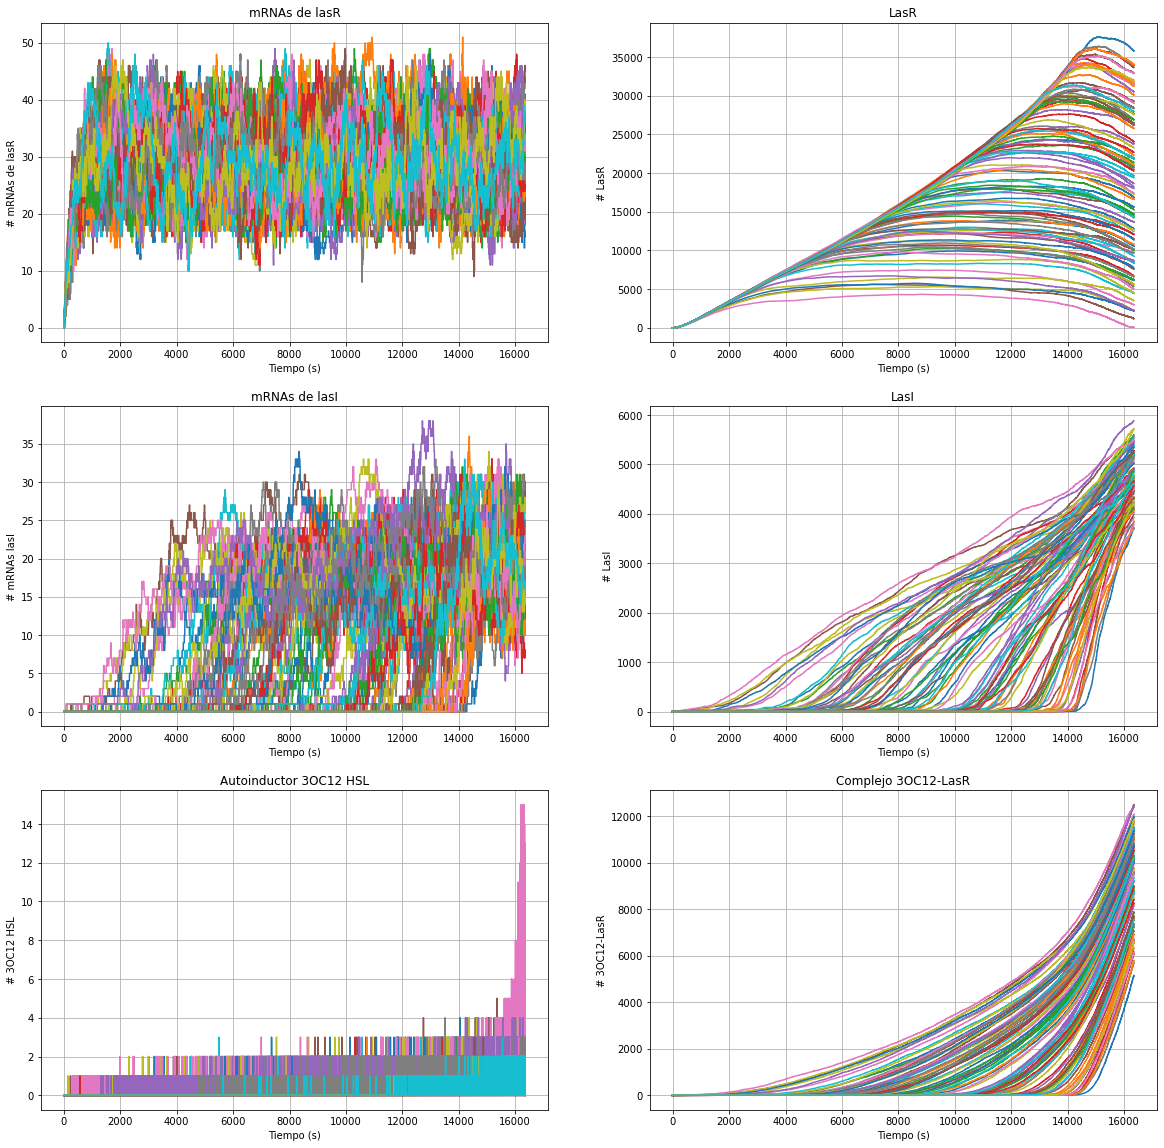

In [3]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
for i in cells[0]:
    plt.plot(cells[0][i]['T'], cells[0][i]['MRNA_R'])
plt.xlabel('Tiempo (s)')
plt.ylabel('# mRNAs de lasR')
plt.title('mRNAs de lasR')
plt.grid()
plt.subplot(3,2,2)
for i in cells[0]:
    plt.plot(cells[0][i]['T'], cells[0][i]['Protein_R'])
plt.xlabel('Tiempo (s)')
plt.ylabel('# LasR')
plt.title('LasR')
plt.grid()
plt.subplot(3,2,3)
for i in cells[0]:
    plt.plot(cells[0][i]['T'], cells[0][i]['MRNA_I'])
plt.xlabel('Tiempo (s)')
plt.ylabel('# mRNAs lasI')
plt.title('mRNAs de lasI')
plt.grid()
plt.subplot(3,2,4)
for i in cells[0]:
    plt.plot(cells[0][i]['T'], cells[0][i]['Protein_I'])
plt.xlabel('Tiempo (s)')
plt.ylabel('# LasI')
plt.title('LasI')
plt.grid()
plt.subplot(3,2,5)
for i in cells[0]:
    plt.plot(cells[0][i]['T'], cells[0][i]['Autoinducer'])
plt.xlabel('Tiempo (s)')
plt.ylabel('# 3OC12 HSL')
plt.title('Autoinductor 3OC12 HSL')
plt.grid()
plt.subplot(3,2,6)
for i in cells[0]:
    plt.plot(cells[0][i]['T'], cells[0][i]['Autoinducer_protein_R'])
plt.xlabel('Tiempo (s)')
plt.ylabel('# 3OC12-LasR')
plt.title('Complejo 3OC12-LasR')
plt.grid()
plt.savefig('Celulas_QS.png', bbox_inches='tight')
plt.show()

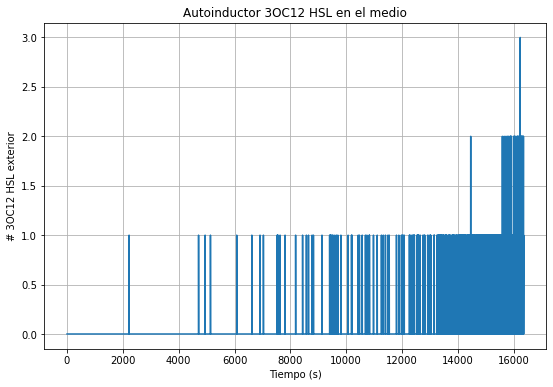

In [4]:
plt.figure(figsize=(9,6))
plt.plot(cells[0][0]['T'], cells[1])
plt.xlabel('Tiempo (s)')
plt.ylabel('# 3OC12 HSL exterior')
plt.title('Autoinductor 3OC12 HSL en el medio')
plt.grid()
plt.savefig('AIext_QS.png', bbox_inches='tight')
plt.show()